In [103]:
import numpy as np
from sklearn.metrics import classification_report, recall_score, precision_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cross_validation import train_test_split

import pandas as pd
from pickle import load, dump

from keras import metrics
import keras.backend as K
from keras.layers import *
from keras.layers.core import *
from keras.layers.recurrent import *
from keras.layers.merge import *
from keras.layers.convolutional import *
from keras.layers.embeddings import *
from keras.layers.wrappers import *
from keras.layers.normalization import *
from keras.layers.advanced_activations import *
from keras.models import *
from keras.callbacks import *
from keras.utils.vis_utils import *

from IPython.display import SVG
import matplotlib.pyplot as plt

In [104]:
def read_data(path):
    df = pd.read_csv(path, header=None)
    Xs = []
    Ys = []

    for id, group in df.groupby(0):
        X = group.values[None, :,2:-1]
        Y = group.values[0, -1]
        Xs.append(X)
        Ys.append(Y)

    Xs = np.concatenate(Xs)
    Ys = keras.utils.to_categorical(np.asarray(Ys))
    return (Xs, Ys)

In [105]:
num_marks = 5
length_bin = 100
num_filters = 50
length_filter = 10
length_pool = 5
length_full_1 = 625
length_full_2 = 125

In [100]:
Xtrain, Ytrain = read_data("../data/toy/train.csv")
Xtest, Ytest = read_data("../data/toy/valid.csv")

In [108]:
Ytest.shape

(9, 2)

In [74]:
print(f"train, X size: {Xtrain.shape}, Y size: {Ytrain.shape}")
print(f"test, X size: {Xtest.shape}, Y size: {Ytest.shape}")

train, X size: (10, 100, 5), Y size: (10,)
test, X size: (9, 100, 5), Y size: (9,)


# Model definition

In [76]:
%%time 
# channel last
input_shape = (length_bin, num_marks)
input = Input(shape=input_shape)

nn = Conv1D(num_filters, length_filter, padding='same', activation="relu")(input)
nn = MaxPooling1D(length_pool, strides=length_pool, padding='same')(nn)
nn = Dropout(0.5)(nn)
nn = Flatten()(nn)
nn = Dense(length_full_1, activation="relu")(nn)
nn = Dense(length_full_2, activation="relu")(nn)
nn = Dense(1, activation="sigmoid")(nn)


clf = Model(inputs=input, outputs=nn)
clf.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

CPU times: user 180 ms, sys: 4 ms, total: 184 ms
Wall time: 184 ms


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 100, 5)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 100, 50)           2550      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 20, 50)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 625)               625625    
_________________________________________________________________
dense_11 (Dense)             (None, 125)               78250     
__________

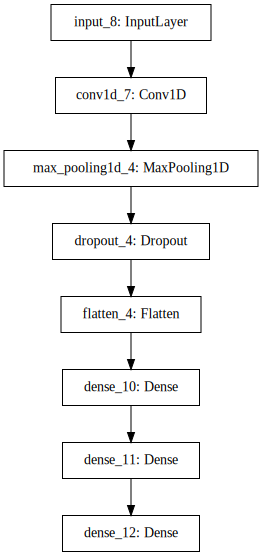

In [77]:
clf.summary()
SVG(model_to_dot(clf).create(prog='dot', format='svg'))

In [78]:
run_name = "deepchrome toy 1"
tb = TensorBoard(log_dir=f"../log/{run_name}", batch_size=32, write_graph=True)
checkpointer = ModelCheckpoint(filepath=f"../model/{run_name}.h5", verbose=1, save_best_only=True, monitor="val_acc")
stopper = EarlyStopping(monitor="val_acc", patience=3)

In [79]:
clf.fit(
    Xtrain,
    Ytrain,
    batch_size=2000,
    callbacks = [tb, checkpointer],
    epochs=10,
    shuffle=True,
    validation_data=(Xtest, Ytest),
    verbose=0)

Epoch 00000: val_acc improved from -inf to 0.33333, saving model to ../model/deepchrome toy 1.h5
Epoch 00001: val_acc improved from 0.33333 to 0.77778, saving model to ../model/deepchrome toy 1.h5
Epoch 00002: val_acc improved from 0.77778 to 1.00000, saving model to ../model/deepchrome toy 1.h5
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
